In [16]:
import os
import pickle
import torch
import numpy as np
from math import ceil
from model_vc import Generator


def pad_seq(x, base=32):
    len_out = int(base * ceil(float(x.shape[0])/base))
    len_pad = len_out - x.shape[0]
    assert len_pad >= 0
    return np.pad(x, ((0,len_pad),(0,0)), 'constant'), len_pad

device = 'cpu'
G = Generator(32,256,512,32).eval().to(device)

g_checkpoint = torch.load('autovc.ckpt',  map_location=torch.device('cpu'))
G.load_state_dict(g_checkpoint['model'])

<All keys matched successfully>

Input: torch.Size([1, 544, 80])
Content Embedding: torch.Size([1, 256])
torch.Size([1, 80, 544])
17
Decoder Input: torch.Size([1, 544, 320])
Postnet Inputs: torch.Size([1, 80, 544])


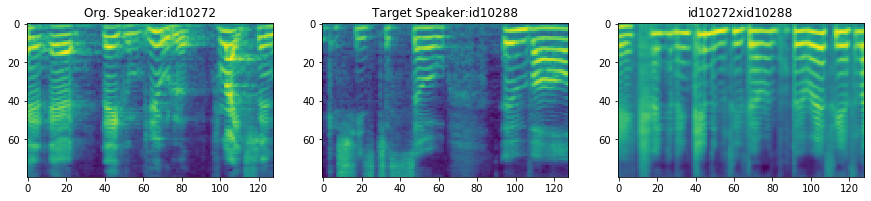

In [18]:
import matplotlib.pyplot as plt

metadata = pickle.load(open('test_metadata_final.pkl', "rb"))

spect_vc = []

for sbmt_i in metadata:
             
    x_org = sbmt_i[2]
    x_org, len_pad = pad_seq(x_org)
    uttr_org = torch.from_numpy(x_org[np.newaxis, :, :]).to(device)
    emb_org = torch.from_numpy(sbmt_i[1][np.newaxis, :]).to(device)
    if sbmt_i[0] != 'id10272':
        continue
    for i, sbmt_j in enumerate(metadata):
        if (i==0 or sbmt_j[0]!= 'id10288'):
            continue
        fig, ax = plt.subplots(1,3, figsize=(15,15))
        ax[0].set_title('Org. Speaker:'+sbmt_i[0])
        original_speaker_id = sbmt_i[0]
        ax[0].imshow(x_org.T[:, :128])
        ax[1].set_title('Target Speaker:'+sbmt_j[0])
        target_speaker_id = sbmt_j[0]
        ax[1].imshow(sbmt_j[2].T[:, :128])
        emb_trg = torch.from_numpy(sbmt_j[1][np.newaxis, :]).to(device)
        
        with torch.no_grad():
            _, x_identic_psnt, _ = G(uttr_org, emb_org, emb_trg)
            
        if len_pad == 0:
            uttr_trg = x_identic_psnt[0, 0, :, :].cpu().numpy()
        else:
            uttr_trg = x_identic_psnt[0, 0, :-len_pad, :].cpu().numpy()
        ax[2].set_title(f'{original_speaker_id}x{target_speaker_id}')
        ax[2].imshow(uttr_trg.T[:, :128])
        spect_vc.append( ('Generated: {}x{}'.format(sbmt_i[0], sbmt_j[0]), uttr_trg) )
        break
    break

        
# with open('results_test_final.pkl', 'wb') as handle:
#     pickle.dump(spect_vc, handle)          

In [3]:
metadata = pickle.load(open('metadata.pkl', "rb"))

In [4]:
for sbmt_i in metadata:
    print(sbmt_i[0])
    print(sbmt_i[1].shape)
    print(sbmt_i[2].shape)
    break

p225
(256,)
(90, 80)


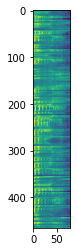

In [4]:
plt.imshow(uttr_trg)

In [5]:
sbmt_j[0]

'id10270'

In [9]:
sbmt_i[0]

'id10270'